![CodeNation](https://s3.us-east-2.amazonaws.com/startse-loja/palestrantes/empresa_palestrante_1174.png?)
# Descubra as melhores notas de matemática do ENEM 2016

### Instruções

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

### Tópicos

Neste desafio você aprenderá:

* Lógica
* Análise de dados
* Estatística
* Regression

### Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

* matemática: 3
* ciências da natureza: 2
* linguagens e códigos: 1.5
* ciências humanas: 1
* redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.

### Observações

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como **Python**, R, Scala ou Julia.

### [BAIXAR ARQUIVO DO DATASET](https://s3-us-west-1.amazonaws.com/codenation-challenges/enem-ps/testfiles.zip)

---


## Exploração dos Dados

### Questionamentos iniciais

- Qual a modelidade de aprendizado Supervisionado ou Não Supervisionado?
- Quero que o meu modelo preveja valores discretos ou contínuos?
- Qual tipo de regressão?



#### Importação das Bibliotecas

In [54]:
# Objetivando a exploração dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Install: conda install -c conda-forge missingno
import missingno as msno

# Encoder 
from sklearn.preprocessing import LabelEncoder, Normalizer

# Cross Validation
from sklearn.model_selection import cross_validate, train_test_split


# Algoritmo de Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Metricas
from sklearn import metrics

from time import time

### Funções para utilização para testar os algoritimos

In [44]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print("O modelo foi treinado em {:.4f} segundos".format(end - start))

def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação R2. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    return metrics.r2_score(target.values, y_pred)

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do R2. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print("Pontuação R2 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("Pontuação R2 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

def pl_plot(clf, features, target):
    y_pred = clf.predict(features)
    return metrics.r2_score(target.values, y_pred)


def tc_plot(clf, X_train, y_train):
    clf.fit(X_train, y_train)

#### Download do Dataset

In [3]:
# apenas no Google Colab 


#### Carregar o _Dataset_ para um _Dataframe_ (Pandas)

In [4]:
df_train = pd.read_csv('testfiles/train.csv')
df_test = pd.read_csv('testfiles/test.csv')

#### Verificando a dimensão dos _Datasets_ de treino e teste fornecidos

In [5]:
df_train.shape

(13730, 167)

In [6]:
df_test.shape

(4576, 47)

**Analise:**

- Constatamos que o dataset de teste possui menos colunas que o de treino;
- Podemos considerar que algumas colunas de inicio são desnecessárias, pelo menos para o presente desafio.


**Analise do Dicionário de Dados desconsiderando que já foi fornecido um _dataset_ de teste com menos colunas.**

No dicionário de dados fornecido as colunas foram agrupadas por:

- Dados do Participante;
- Dados da Escola;
- Dados dos Pedidos de Atendimento Especilizado;
- Dados dos Pedidos de Atendimento Específico;
- Dados dos Pedidos de Recursos Especializados e Específicos para realização das Provas;
- Dados dos pedidos de Cerificação do Ensino Médio;
- Dados do Local de Aplicação da Prova;
- Dados da Prova Objetiva;
- Dados da Redação;
- Dados do Questionário Socioeconômico;


### Dicionário de Variáveis - Selecionados para o Treino

---

#### Dados do Participante

| Nome da Variável        | Descrição                            | Consta no Dataset de Teste |
|:------------------------|:-------------------------------------------------------------|:--:|
| NO_MUNICIPIO_RESIDENCIA | NO_MUNICIPIO_RESIDENCIA                                      | ❌ |
| SG_UF_RESIDENCIA        | Sigla da Unidade da Federação de residência                  | ✅ | 
| NU_IDADE                | Idade                                                        | ✅ |
| TP_SEXO                 | Sexo                                                         | ✅ |
| TP_ESTADO_CIVIL         | Estado Civil                                                 | ❌ |
| TP_COR_RACA             | Cor / Raça                                                   | ✅ |
| TP_NACIONALIDADE        | Nacionalidade                                                | ✅ |
| TP_ST_CONCLUSAO         | Situação de conclusão do Ensino Médio                        | ✅ |
| TP_ANO_CONCLUIU         | Ano de Conclusão do Ensino Médio                             | ✅ |
| TP_ESCOLA               | Tipo de escola do Ensino Médio                               | ✅ |
| TP_ENSINO               | Tipo de instituição que concluiu ou concluirá o Ensino Médio | ✅ |  
| IN_TREINEIRO            | Fez a prova com intuito de apenas treinar seus conhecimentos | ✅ |

---

#### Dados da Escola

| Nome da Variável       | Descrição       | Consta no Dataset de Teste |
|:-----------------------|:----------------------------------------|:--:|
| NO_MUNICIPIO_ESC       | Nome do município da escola             | ❌ | 
| SG_UF_ESC              | Sigla da Unidade da Federação da escola | ❌ |
| TP_DEPENDENCIA_ADM_ESC | Dependência administrativa (Escola)     | ✅ |
| TP_LOCALIZACAO_ESC     | Localização (Escola)                    | ❌ |
| TP_SIT_FUNC_ESC        | Situação de funcionamento (Escola)      | ❌ |

___

#### Dados dos Pedidos de Atendimento Especilizado

| Nome da Variável        | Descrição                   | Consta no Dataset de Teste |
|:------------------------|:----------------------------------------------------|:--:|
| IN_BAIXA_VISAO          | Indicador de baixa visão                            | ✅ |
| IN_CEGUEIRA             | Indicador de cegueira                               | ✅ |
| IN_SURDEZ               | Indicador de surdez                                 | ✅ |
| IN_DEFICIENCIA_AUDITIVA | Indicador de deficiência auditiva                   | ❌ |
| IN_SURDO_CEGUEIRA       | Indicador de surdo-cegueira                         | ❌ |
| IN_DEFICIENCIA_FISICA   | Indicador de deficiência física                     | ❌ |
| IN_DEFICIENCIA_MENTAL   | Indicador de deficiência mental                     | ❌ |
| IN_DEFICIT_ATENCAO      | Indicador de déficit de atenção                     | ❌ |
| IN_DISLEXIA             | Indicador de dislexia                               | ✅ |
| IN_DISCALCULIA          | Indicador de discalculia                            | ✅ |
| IN_AUTISMO              | Indicador de autismo                                | ❌ |
| IN_VISAO_MONOCULAR      | Indicador de visão monocular                        | ❌ |
| IN_OUTRA_DEF            | Indicador de outra deficiência ou condição especial | ❌ |

___

#### Dados dos Pedidos de Atendimento Específico

| Nome da Variável            | Descrição                                | Consta no Dataset de Teste |
|:----------------------------|:-----------------------------------------------------------------|:--:|
| IN_SABATISTA                | Indicador de horário diferenciado para os guardadores dos sábado | ✅ |
| IN_GESTANTE                 | Indicador de gestante                                            | ✅ |
| IN_LACTANTE                 | Indicador de lactante                                            | ❌ |
| IN_IDOSO                    | Indicador de inscrito idoso	                                     | ✅ |
| IN_ESTUDA_CLASSE_HOSPITALAR | Indicador de inscrição em Unidade Hospitalar                     | ❌ |

---

#### Dados dos Pedidos de Recursos Especializados e Específicos para realização das Provas

| Nome da Variável         | Descrição                                    | Consta no Dataset de Teste |
|:-------------------------|:--------------------------------------------------------------------------------|:--:|
| IN_SEM_RECURSO           | Indicador de inscrito que não requisitou nenhum recurso                         | ❌ |
| IN_BRAILLE               | Indicador de solicitação de prova em braille                                    | ❌ |
| IN_AMPLIADA_24           | Indicador de solicitação de prova superampliada com fonte tamanho 24            | ❌ |
| IN_AMPLIADA_18           | Indicador de solicitação de prova ampliada com fonte tamanho 18                 | ❌ |
| IN_LEDOR                 | Indicador de solicitação de auxílio para leitura (ledor)                        | ❌ |
| IN_ACESSO	               | Indicador de solicitação de sala de fácil acesso                                | ❌ |
| IN_TRANSCRICAO           | Indicador de solicitação de auxílio para transcrição                            | ❌ |
| IN_LIBRAS	               | Indicador de solicitação de Tradutor- Intérprete Libras                         | ❌ |
| IN_LEITURA_LABIAL        | Indicador de solicitação de leitura labial                                      | ❌ |
| IN_MESA_CADEIRA_RODAS    | Indicador de solicitação de mesa para cadeira de rodas                          | ❌ |
| IN_MESA_CADEIRA_SEPARADA | Indicador de solicitação de mesa e cadeira separada                             | ❌ |
| IN_APOIO_PERNA           | Indicador de solicitação de apoio de perna e pé                                 | ❌ |
| IN_GUIA_INTERPRETE       | Indicador de solicitação de guia intérprete                                     | ❌ |
| IN_MACA                  | Indicador de solicitação de maca                                                | ❌ |
| IN_COMPUTADOR	           | Indicador de solicitação de computador                                          | ❌ |
| IN_CADEIRA_ESPECIAL      | Indicador de solicitação de cadeira especial                                    | ❌ |
| IN_CADEIRA_CANHOTO       | Indicador de solicitação de cadeira para canhoto                                | ❌ |
| IN_CADEIRA_ACOLCHOADA    | Indicador de solicitação de cadeira acolchoada                                  | ❌ |
| IN_PROVA_DEITADO	       | Indicador de solicitação para fazer prova deitado em maca ou mobiliário similar | ❌ |
| IN_MOBILIARIO_OBESO	   | Indicador de solicitação de mobiliário adequado para obeso                      | ❌ |
| IN_LAMINA_OVERLAY	       | Indicador de solicitação de lâmina overlay                                      | ❌ |
| IN_PROTETOR_AURICULAR	   | Indicador de solicitação de protetor auricular                                  | ❌ |
| IN_MEDIDOR_GLICOSE	   | Indicador de solicitação de medidor de glicose e/ou aplicação de insulina       | ❌ |
| IN_MAQUINA_BRAILE	       | Indicador de solicitação de máquina Braile e/ou Reglete e Punção                | ❌ |
| IN_SOROBAN	           | Indicador de solicitação de soroban                                             | ❌ |
| IN_MARCA_PASSO	       | Indicador de solicitação para não usar de detector de metais)                   | ❌ |
| IN_SONDA	               | Indicador de solicitação de sonda com troca periódica                           | ❌ |
| IN_MEDICAMENTOS	       | Indicador de solicitação de medicamentos                                        | ❌ |
| IN_SALA_INDIVIDUAL       | Indicador de solicitação de sala especial individual                            | ❌ |
| IN_SALA_ESPECIAL	       | Indicador de solicitação de sala especial até 20 participantes                  | ❌ |
| IN_SALA_ACOMPANHANTE	   | Indicador de solicitação de sala reservada para acompanhantes                   | ❌ |
| IN_MOBILIARIO_ESPECIFICO | Indicador de solicitação de mobiliário específico                               | ❌ |
| IN_MATERIAL_ESPECIFICO   | Indicador de solicitação de material específico                                 | ❌ |
| IN_NOME_SOCIAL           | Indicador de inscrito que se declarou travesti, transexual ou transgênero e solicitou atendimento pelo Nome Social, conforme é reconhecido socialmente em consonância com sua identidade de gênero | ❌ |

---

#### Dados dos pedidos de Cerificação do Ensino Médio

| Nome da Variável | Descrição                        | Consta no Dataset de Teste |
|:-----------------|:---------------------------------------------------------|:--:|
| IN_CERTIFICADO   | Indicador de solicitação de certificação no Ensino Médio | ❌ |

---

#### Dados do Local de Aplicação da Prova

| Nome da Variável | Descrição | Consta no Dataset de Teste |
|------------------|-----------|----------------------------|

---

#### Dados da Prova Objetiva

| Nome da Variável | Descrição        | Consta no Dataset de Teste |
|:-----------------|:-----------------------------------------|:--:|
| TP_PRESENCA_MT   | Presença na prova objetiva de Matemática | ❌ |
| CO_PROVA_MT      | Código do tipo de prova de Matemática    | ✅ |
| NU_NOTA_MT       | Nota da prova de Matemática              | ❌ |

---

#### Dados da Redação

| Nome da Variável | Descrição | Consta no Dataset de Teste |
|------------------|-----------|----------------------------|

---

#### Dados do Questionário Socioeconômico

| Nome da Variável | Descrição                                               | Consta no Dataset de Teste |
|:-----------------|:----------------------------------------------------------------------------------------|:--:|
| Q001             | Até que série seu pai, ou o homem responsável por você, estudou?                        | ✅ |
| Q002             | Até que série sua mãe, ou a mulher responsável por você, estudou?                       | ✅ |
| Q003             | A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).                                         | ❌ |
| Q004             | A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).                                         | ❌ |
| Q006             | Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)     | ✅ |
| Q007             | Em sua residência trabalha empregado(a) doméstico(a)?                                   | ❌ | 
| Q008             | Na sua residência tem banheiro?                                                         | ❌ |
| Q009             | Na sua residência tem quartos para dormir?                                              | ❌ |
| Q010             | Na sua residência tem carro?                                                            | ❌ |
| Q011             | Na sua residência tem motocicleta?                                                      | ❌ |
| Q022             | Na sua residência tem telefone celular?                                                 | ❌ |
| Q024             | Na sua residência tem computador?                                                       | ✅ |
| Q025             | Na sua residência tem acesso à Internet?                                                | ✅ |
| Q026             | Você exerce ou já exerceu atividade remunerada?                                         | ✅ |
| Q027             | Com que idade você começou a exercer uma atividade remunerada?                          | ✅ |
| Q028             | Quantas horas semanais você trabalha ou trabalhava aproximadamente? (Considere a atividade remunerada mais recente.)                                                                                    | ❌ |
| Q029             | Indique a importância de cada um dos motivos abaixo na sua decisão de trabalhar: Ajudar meus pais nas despesas com a casa.                                                                                | ❌ |
| Q030             | Indique a importância de cada um dos motivos abaixo na sua decisão de trabalhar: Sustentar minha família (esposo/a, filhos/as etc.).                                                                    | ❌ |
| Q031             | Indique a importância de cada um dos motivos abaixo na sua decisão de trabalhar: Ser independente/ganhar meu próprio dinheiro.                                                                    | ❌ |
| Q032             | Indique a importância de cada um dos motivos abaixo na sua decisão de trabalhar: Adquirir experiência.                                                                                                 | ❌ |
| Q033             | Indique a importância de cada um dos motivos abaixo na sua decisão de trabalhar: Custear/pagar meus estudos.                                                                                                | ❌ | 
| Q034             | Indique os motivos que levaram você a participar do ENEM: Testar meus conhecimentos, para aumentar as minhas chances de ingressar na Educação Superior.                                                | ❌ |
| Q035             | Indique os motivos que levaram você a participar do ENEM: Ingressar na Educação Superior pública.                                                                                                     | ❌ | 
| Q036             | Indique os motivos que levaram você a participar do ENEM: Ingressar na Educação Superior privada.                                                                                                     | ❌ |
| Q037             | Indique os motivos que levaram você a participar do ENEM: Conseguir uma bolsa de estudos (ProUni, outras).                                                                                            | ❌ |
| Q038             | Indique os motivos que levaram você a participar do ENEM: Participar do Programa de Financiamento Estudantil - FIES.                                                                             | ❌ |
| Q039             | Indique os motivos que levaram você a participar do ENEM: Participar do Programa Ciências Sem Fronteiras.                                                                                                  | ❌ |
| Q040             | Indique os motivos que levaram você a participar do ENEM: Aumentar a possibilidade de conseguir um emprego.                                                                                        | ❌ |
| Q041             | Indique os motivos que levaram você a participar do ENEM: Progredir no meu emprego atual.                                                                                                                  | ❌ |
| Q042             | Em que tipo de escola você frequentou o Ensino Fundamental?                             | ❌ |
| Q043             | Marque entre as opções abaixo aquela que melhor descreve a modalidade de Ensino Fundamental que você frequentou                                                                                          | ❌ |
| Q044             | Em que turno você frequentou o Ensino Fundamental?                                      | ❌ |
| Q045             | Durante o Ensino Fundamental, você abandonou os estudos por algum tempo e/ou foi reprovado?                                                                                                                | ❌ |
| Q046             | Você já concluiu ou está concluindo o Ensino Médio?                                     | ❌ |
| Q047             | Em que tipo de escola você frequentou o Ensino Médio?                                   | ✅ |
| Q048             | Marque entre as opções abaixo aquela que melhor descreve a modalidade de Ensino Médio que você frequentou                                                                                                   | ❌ |
| Q049             | Em que turno você frequentou o Ensino Médio?                                            | ❌ |
| Q050             | Durante o Ensino Médio, você abandonou os estudos por algum tempo e/ou foi reprovado?   | ❌ |

#### Justificativa de selecionar as features acima

- Acredito que as questões socio-economica influenciam na qualidade de aprendizado, não como fator determinantem, mas como influenciado;
- Acredito que as limitações físicas e cognitivas são questões que influenciam no aprendizado por falta de recursos (ferramenta metodologica ou equipamento) para dimuir as dificuldades sofridas;

### Observação: Mas, o presente analise foi apenas para aprendizado e cogitação de um estudo futuro mais aprofundado.

In [7]:
# para apresentar todas as colunas
pd.options.display.max_columns = None

df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [8]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


**Observação:** Usaremos as features que existe no _dataframe Test_ para analisarmos e determinar qual devemos utilizar para melhor predição.

In [9]:
list_features_test = list(df_test)
list_features_test.append('NU_NOTA_MT')

df_train_selected_test = df_train[list_features_test]

### Analise do Label

In [10]:
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

#### Histograma de área de unidade

Usando a distrubição de frenquência para analise percebemos o que?

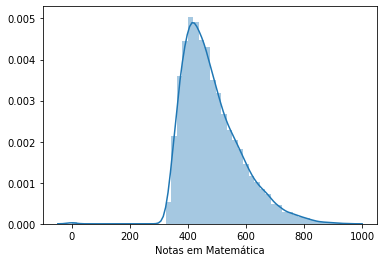

In [11]:
# Plotar o histograma
x = pd.Series(df_train['NU_NOTA_MT'], name="Notas em Matemática")
sns.distplot(x)

- Constatamos que trata-se de um histograma assimétrico com uma ilha de isolada, pequena na nota de valor 0 (zero);
- **Com essa analise podemos tirar do nosso _dataset_ os registros que possuem nota 0 (zero) em matemática.**

**Observação:** O eixo Y representa a fração total de cada categoria representada e a área total de todas as barras é igual a 1. Então perceba que não houve agrupamento no eixo X.

In [12]:
# skewness and kurtosis
print("Skewness: %f" % df_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % df_train['NU_NOTA_MT'].kurt())

Skewness: 0.920690
Kurtosis: 1.422503


#### Verificando as correlações fortes

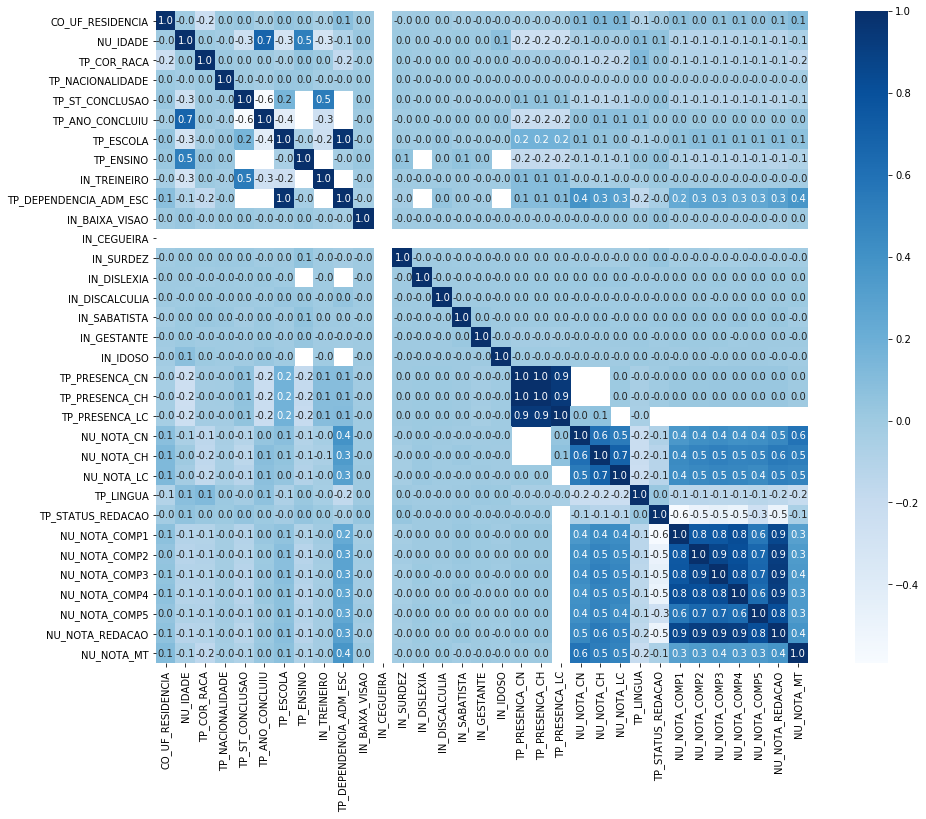

In [13]:
fig, ax = plt.subplots(figsize=(17,12))
sns.heatmap(df_train_selected_test.corr(), annot = True, square=True, fmt = '.1f', cmap = 'Blues')

**Analise:**

- Analisando a matriz de correlação percebemos podemos excluir as colunas abaixo, por ter correlação neutra: 
    - TP_NACIONALIDADE, TP_ANO_CONCLUIU, IN_TREINEIRO, IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DISLEXIA, IN_DISCALCULIA, IN_SABATISTA, IN_GESTANTE, IN_IDOSO, TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_DEPENDENCIA_ADM_ESC.

In [14]:
list_features_selected = ['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
                          'TP_ENSINO','CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
                          'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                          'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
                          'Q027', 'Q047','NU_NOTA_MT']
df_train_selected = df_train[list_features_selected]

#### Verificando Dados Faltantes

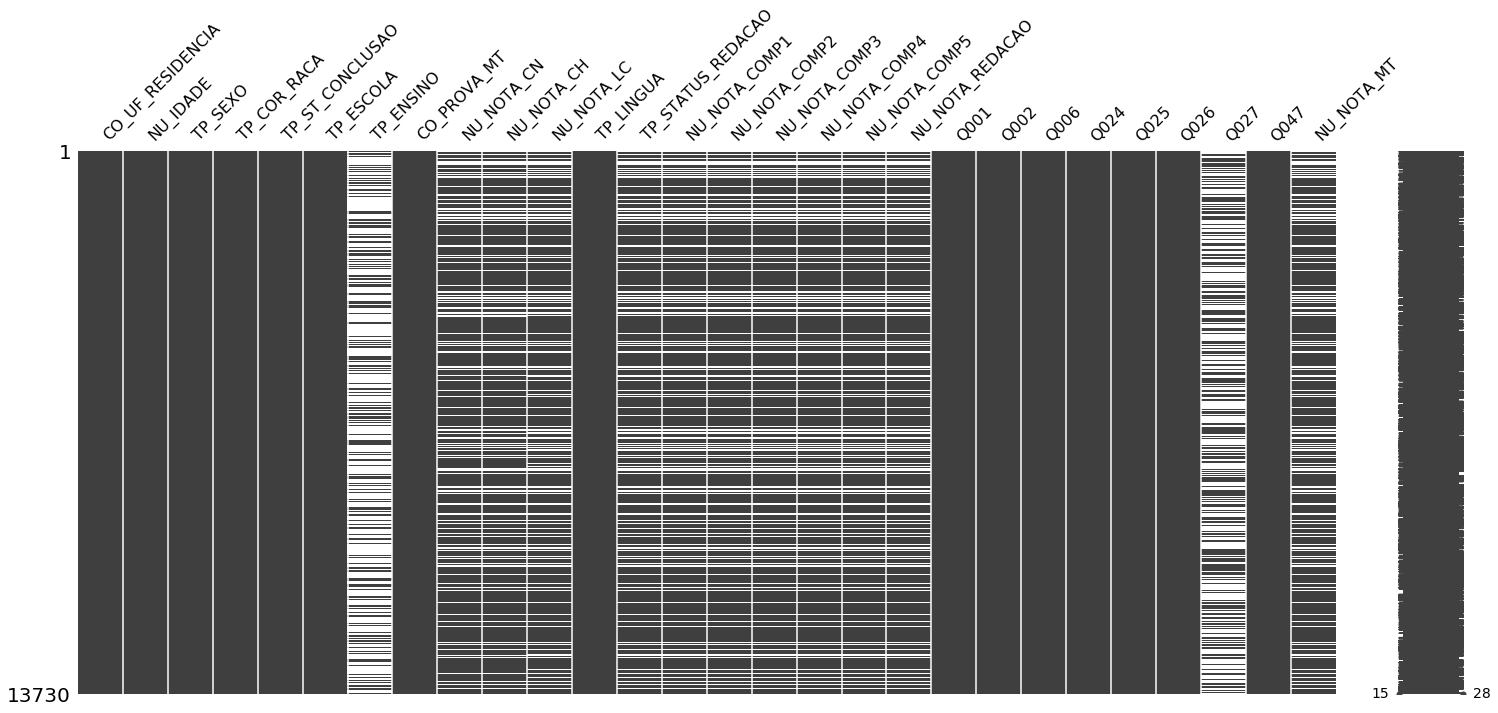

In [15]:
msno.matrix(df_train_selected)

In [16]:
df_train_selected.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,24,M,1,1,1,NaN,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,23,17,F,3,2,2,1.0,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,21,F,3,3,1,NaN,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,25,F,0,1,1,NaN,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,13,28,M,2,1,1,NaN,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


**Analise:**

- Identificamos que as colunas TP_ENSINO e TP_STATUS_REDACAO, possuem registros com valor **nan**, devemos substituir pelo valor -1 (zero); e segue outros casos:
- Substituir as linhas que possuem **nan**, nas colunas NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5, NU_NOTA_REDACAO, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC e NU_NOTA_MT, por 0 (zero);
- Substituir as linhas que possuem **nan**, na coluna Q027, por 'Z';


#### Imputação dos dados

In [17]:
valor = { 'NU_NOTA_MT': 0
 , 'TP_ENSINO': -1
 , 'NU_NOTA_CN': 0
 , 'NU_NOTA_CH': 0
 , 'NU_NOTA_LC': 0
 , 'TP_STATUS_REDACAO': -1 
 , 'NU_NOTA_COMP1': 0
 , 'NU_NOTA_COMP2': 0
 , 'NU_NOTA_COMP3': 0
 , 'NU_NOTA_COMP4': 0
 , 'NU_NOTA_COMP5': 0 
 , 'NU_NOTA_REDACAO': 0
 , 'Q027': 'Z'}
df_train_selected = df_train_selected.fillna(value=valor)

#### Pre-Processamento de Encoder de valores categoricos para valor entre 0 e 1+n classes

In [18]:
label_encoder = LabelEncoder()

df_train_selected['TP_SEXO'] = label_encoder.fit_transform(df_train_selected['TP_SEXO'])
df_train_selected['CO_PROVA_MT'] = label_encoder.fit_transform(df_train_selected['CO_PROVA_MT'])
df_train_selected['Q001'] = label_encoder.fit_transform(df_train_selected['Q001'])
df_train_selected['Q002'] = label_encoder.fit_transform(df_train_selected['Q002'])
df_train_selected['Q006'] = label_encoder.fit_transform(df_train_selected['Q006'])
df_train_selected['Q024'] = label_encoder.fit_transform(df_train_selected['Q024'])
df_train_selected['Q025'] = label_encoder.fit_transform(df_train_selected['Q025'])
df_train_selected['Q026'] = label_encoder.fit_transform(df_train_selected['Q026'])
df_train_selected['Q027'] = label_encoder.fit_transform(df_train_selected['Q027'])
df_train_selected['Q047'] = label_encoder.fit_transform(df_train_selected['Q047'])

In [ ]:
sns.set()
sns.pairplot(df_train_selected, size = 2.5)

### Cross Validation

modelo de previsão (regressão linear, logística (já que é binário), multivariada, exponencial, polinomial, SVM, Naive Bayes, kernel..).

In [19]:
list_features = ['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
                          'TP_ENSINO','CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
                          'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                          'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
                          'Q027', 'Q047']

list_label = ['NU_NOTA_MT']

In [20]:
# X = df_train_selected[list_features]
X = df_train_selected[list_features]
y = df_train_selected[list_label]

In [22]:
# Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.24, random_state=42)

# Mostre o resultado da distribuição
print("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

O conjunto de treinamento tem 10434 amostras.
O conjunto de teste tem 3296 amostras.


### Algoritmo de Regressão Linear

In [48]:
# Inicialize os quatro modelos
reg_A = LinearRegression()
reg_B = DecisionTreeRegressor(random_state = 42)
reg_C = SVR()

In [49]:
# Configure o tamanho dos conjuntos de treinamento
for clf in [reg_A, reg_B, reg_C]:

    # tamanhos das amostras
    for n in [1739, 3478, 5217, 6956, 8695, 10434]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)

Treinando um LinearRegression com 1739 pontos de treinamento. . .
O modelo foi treinado em 0.0032 segundos
As previsões foram feitas em 0.0011 segundos.
Pontuação R2 para o conjunto de treino: 0.9127.
As previsões foram feitas em 0.0011 segundos.
Pontuação R2 para o conjunto de teste: 0.9129.
Treinando um LinearRegression com 3478 pontos de treinamento. . .
O modelo foi treinado em 0.0038 segundos
As previsões foram feitas em 0.0012 segundos.
Pontuação R2 para o conjunto de treino: 0.9081.
As previsões foram feitas em 0.0012 segundos.
Pontuação R2 para o conjunto de teste: 0.9141.
Treinando um LinearRegression com 5217 pontos de treinamento. . .
O modelo foi treinado em 0.0034 segundos
As previsões foram feitas em 0.0011 segundos.
Pontuação R2 para o conjunto de treino: 0.9079.
As previsões foram feitas em 0.0010 segundos.
Pontuação R2 para o conjunto de teste: 0.9144.
Treinando um LinearRegression com 6956 pontos de treinamento. . .
O modelo foi treinado em 0.0037 segundos
As previsõe

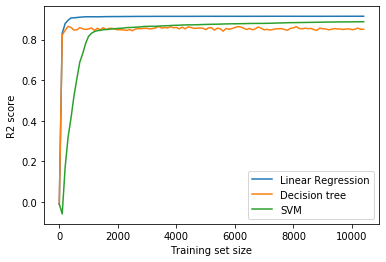

Média de R2 para:
Linear Regression : 0.9037
Decision tree : 0.8448
SVM : 0.8293


In [53]:
#Define quantos passos de treinamento iremos avaliar.
step_size = 100

#Método que é responsável por resgatar o índice F1 de cada classificador para diferentes tamanhos de amostra
def get_R2(clf, training_set_size):
        X_train_sample = X_train[:training_set_size]
        y_train_sample = y_train[:training_set_size]
        tc_plot(clf, X_train_sample, y_train_sample)
        return pl_plot(clf, X_test, y_test)

#Aqui criamos uma lista com todos os resultados de F1 para cada um dos classificadores    
r2_list_all = []
for clf in [reg_A, reg_B, reg_C]:
    r2_list = []
    for training_set_size in range(1,10435,step_size):
        r2_list.append(get_R2(clf, training_set_size))
    r2_list_all.append(r2_list)

#Aqui geramos um gráfico que irá nos revelar a evolução do F1 de cada classificador
plt.plot(range(1,10435,step_size), r2_list_all[0], label='Linear Regression')
plt.plot(range(1,10435,step_size), r2_list_all[1], label='Decision tree')
plt.plot(range(1,10435,step_size), r2_list_all[2], label='SVM')

#Configurando eixos 
plt.xlabel('Training set size')
plt.ylabel('R2 score')
plt.legend(loc=4)  

#gerando grafico 
plt.show()

print('Média de R2 para:')
print('Linear Regression : {:.4f}'.format(np.mean(r2_list_all[0])))
print('Decision tree : {:.4f}'.format(np.mean(r2_list_all[1])))
print('SVM : {:.4f}'.format(np.mean(r2_list_all[2])))

### Treinar o modelo e verificaro o seu R2 Score

In [56]:
model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train, y_train)

print("Score = {}".format(model_linear_regression.score(X_train,y_train).round(2)))

Score = 0.91


In [57]:
result = model_linear_regression.predict(X_test)
print("R2 Score = {}".format(metrics.r2_score(y_test,result).round(2)))

R2 Score = 0.91


### Normaliação dos valores de todas as Features

O espoco é verificar se com a normalização dos valores das features se há um ganho no score. Pois, a normalização tende eliminar os pessoas de número alto comparado com outro valores menores.

In [58]:
normer = Normalizer()
model_normer = LinearRegression()
X_train = normer.fit_transform(X_train)
X_test = normer.transform(X_test)

model_normer.fit(X_train, y_train)
print("Score = {}".format(model_normer.score(X_train,y_train).round(2)))

Score = 0.86


In [59]:
result = model_normer.predict(X_test)
print("R2 Score = {}".format(metrics.r2_score(y_test,result).round(2)))

R2 Score = 0.87


### Usar o modelo que foi treinado e gerar o arquivo de validação do Desafio

In [ ]:
test = df_test[list_features]
nu_inscricao = df_test['NU_INSCRICAO']
test = test.fillna(value=valor)

In [ ]:
nota_matematica = model_linear_regression.predict(test)

In [ ]:
df_nota_matematica = pd.DataFrame(nota_matematica)
df_done = pd.DataFrame(nu_inscricao)
df_done['NU_NOTA_MT'] = nota_matematica

In [ ]:
# No ENEM não há nota negativa
df_done.loc[df_done['NU_NOTA_MT'] < 0, 'NU_NOTA_MT'] = 0

In [ ]:
df_done

In [ ]:
df_done.to_csv('answer.csv', index=False)